In [1]:
from selenium import webdriver
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

print(plt.style.available)
%matplotlib inline

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
driver = webdriver.Edge()

url = 'https://esf.fang.com/house-a015277-b05/'
driver.get(url)

In [3]:
# Initialize lists to store data
data = []

for i in range(2):
    # Extract table rows
    rows = driver.find_elements(By.CSS_SELECTOR, "dl.clearfix")

    # Loop through rows and extract data
    for row in rows:
        # get area
        area_element = row.find_element(By.CSS_SELECTOR, "p.tel_shop")
        area_text = area_element.text
        area_parts = [part.strip() for part in area_text.split('|')]
        area = next(part for part in area_parts if '㎡' in part)
        area = area.replace('㎡', '')
        
        # get total_price
        total_price_element = row.find_element(By.CSS_SELECTOR, "dd.price_right")
        total_price = total_price_element.find_element(By.CSS_SELECTOR, "span.red b").text
        
        # get unit_price
        unit_price = total_price_element.find_element(By.XPATH, "./span[contains(text(), '元/㎡')]").text
        unit_price = unit_price.replace('元/㎡', '')
        
        data.append([area, total_price, unit_price])
        
    if i<1:
        try:
            next_page = driver.find_element('class name','last')
            next_page.click()
        except NoSuchElementException:
            print("NoSuchElementException")
    
house = pd.DataFrame(data, columns=['area', 'total_price', 'unit_price'])
house['area'] = pd.to_numeric(house['area'], errors='coerce')
house['total_price'] = pd.to_numeric(house['total_price'], errors='coerce')
house['unit_price'] = pd.to_numeric(house['unit_price'], errors='coerce')
print(house)
house.to_csv('House_Beitaipingzhuang.csv', index=False)

driver.quit()

      area  total_price  unit_price
0    60.30          598       99170
1    33.15          350      105580
2    93.49          805       86105
3    57.70          530       91854
4    54.13          415       76667
..     ...          ...         ...
107  92.12          990      107468
108  69.60          626       89942
109  59.90          533       88981
110  52.50          399       76000
111  52.50          399       76000

[112 rows x 3 columns]


In [4]:
driver = webdriver.Edge()
url = 'https://zu.fang.com/house-a015277-b05/'
driver.get(url)

In [5]:
# Initialize lists to store data
data = []

# Extract table rows
rows = driver.find_elements(By.CSS_SELECTOR, "dl.list.hiddenMap.rel")

# Loop through rows and extract data
for row in rows:
    # get area
    area_element = row.find_element(By.CSS_SELECTOR, "p.font15.mt12.bold")
    area_text = area_element.text
    area_parts = [part.strip() for part in area_text.split('|')]
    area = next(part for part in area_parts if '㎡' in part)
    area = area.replace('㎡', '')
    # get total_price
    total_price_element = row.find_element(By.CSS_SELECTOR, "div.moreInfo span.price")
    total_price = f"{total_price_element.text}元/月"
    total_price = total_price.replace('元/月', '')

    data.append([area, total_price])

rent = pd.DataFrame(data, columns=['area', 'total_price'])
rent['area'] = pd.to_numeric(rent['area'], errors='coerce')
rent['total_price'] = pd.to_numeric(rent['total_price'], errors='coerce')
rent['unit_price'] = rent['total_price'] / rent['area']
print(rent)
rent.to_csv('Rent_Beitaipingzhuang.csv', index=False)
driver.quit()

    area  total_price  unit_price
0     50         5200  104.000000
1     50         5000  100.000000
2    109        15500  142.201835
3     51         7300  143.137255
4     82         7800   95.121951
5     26         4800  184.615385
6     26         4800  184.615385
7    109        15500  142.201835
8     76        11700  153.947368
9    110         9000   81.818182
10    74        12000  162.162162
11    76        11700  153.947368
12    26         4800  184.615385
13    68         9500  139.705882
14    76        15500  203.947368
15    20         2800  140.000000
16    82         9700  118.292683
17    56         7600  135.714286
18    45         6200  137.777778
19    26         5000  192.307692
20    55         7300  132.727273
21    37         5600  151.351351
22    56         7600  135.714286
23    74        12000  162.162162
24    68         9500  139.705882
25    45         6200  137.777778
26    37         5600  151.351351
27    26         4800  184.615385
28    95      

              area   total_price          num
count  1918.000000  1.918000e+03  1918.000000
mean    160.246168  2.182180e+07     3.162669
std      66.402091  1.469161e+07     1.057859
min      33.150000  3.389965e+06     1.000000
25%     122.070000  1.430000e+07     2.000000
50%     162.000000  1.860000e+07     4.000000
75%     188.080000  2.460000e+07     4.000000
max     556.000000  1.350000e+08     4.000000
              area    total_price          num
count  1991.000000    1991.000000  1991.000000
mean    140.801105   20819.555500     3.072325
std      74.157774   18968.968476     1.125668
min       6.000000    2000.000000     1.000000
25%      83.000000   10500.000000     2.000000
50%     144.000000   16500.000000     4.000000
75%     176.000000   23000.000000     4.000000
max    1501.000000  160000.000000     4.000000


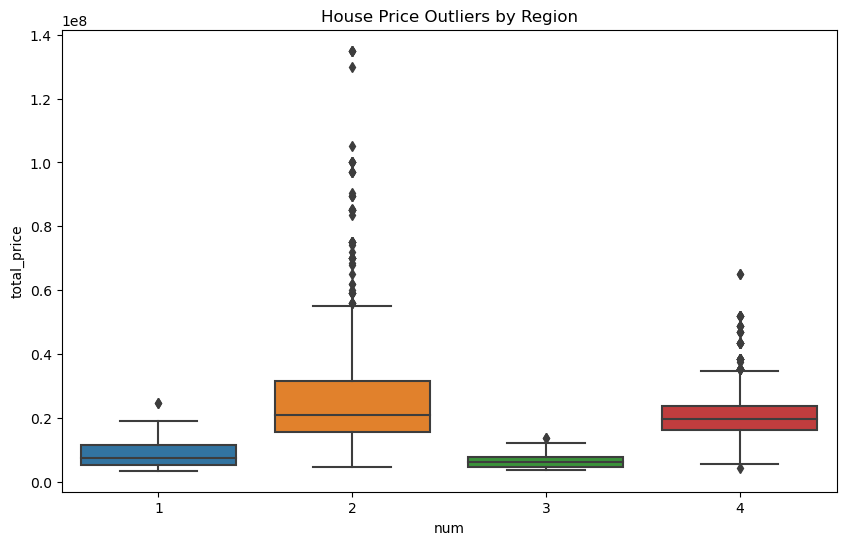

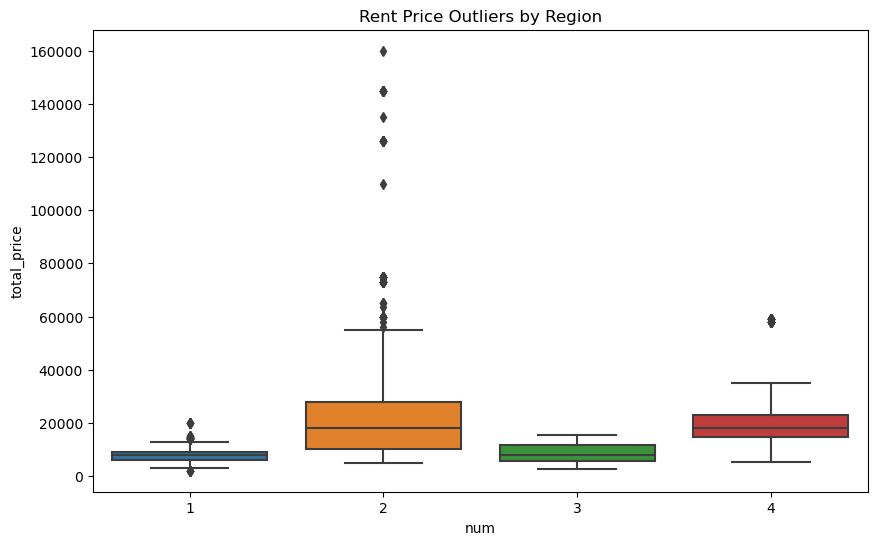

In [6]:
# 1. Read and describe data
house = pd.read_csv('house.csv')
rent = pd.read_csv('rent.csv')

# Descriptive statistics
house_desc = house.describe()
rent_desc = rent.describe()
print(house_desc)
print(rent_desc)

# Check for outliers using boxplots
def plot_outliers(df, title):
    plt.figure(figsize = (10, 6))
    sns.boxplot(x = 'num', y = 'total_price', data = df)
    plt.title(title)
    plt.show()
    
plot_outliers(house, 'House Price Outliers by Region')
plot_outliers(rent, 'Rent Price Outliers by Region')

In [7]:
# 2. Calculate price per m²
house['price_per_m2'] = house['total_price'] / house['area']
rent['rent_per_m2'] = rent['total_price'] / rent['area']

In [8]:
# 3. Calculate median rent-price ratio
# 1, 2, 3, 4 represent Suzhou Bridge, Wanliu, Beitaipingzhuang, Shiji Cheng respectively
median_house = house.groupby('num')['price_per_m2'].median().reset_index()
median_rent = rent.groupby('num')['rent_per_m2'].median().reset_index()
merged = pd.merge(median_house, median_rent, on = 'num')
merged['price_rent_ratio'] = merged['price_per_m2'] / merged['rent_per_m2']
print(merged)

   num   price_per_m2  rent_per_m2  price_rent_ratio
0    1   86713.000000   133.333333        650.347500
1    2  145669.291339   148.765274        979.188809
2    3   89462.082398   142.201835        629.120450
3    4  124553.193979   114.906832       1083.949418


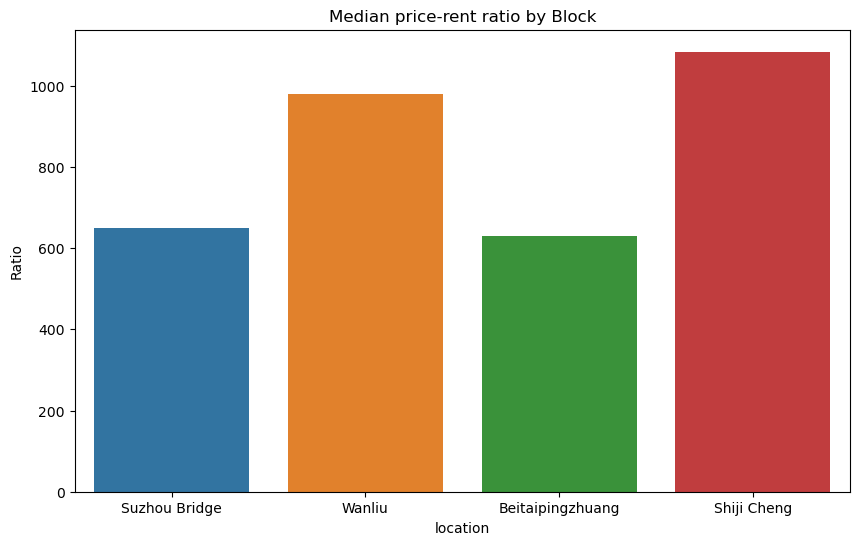

In [9]:
# 4. Plot rent-price ratio
location_map = {1: 'Suzhou Bridge', 2: 'Wanliu', 3: 'Beitaipingzhuang', 4: 'Shiji Cheng'}
merged['location'] = merged['num'].map(location_map)
plt.figure(figsize=(10, 6))
sns.barplot(x = 'location', y = 'price_rent_ratio', data=merged)
plt.title('Median price-rent ratio by Block')
plt.ylabel('Ratio')
plt.show()

In [10]:
# 5. Linear regression for house price
house_model = smf.ols('price_per_m2 ~ area * C(num)', data = house).fit()
house_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_per_m2   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     283.2
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          8.50e-290
Time:                        23:07:48   Log-Likelihood:                -21973.
No. Observations:                1918   AIC:                         4.396e+04
Df Residuals:                    1910   BIC:                         4.401e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9.292e+04   4380.032     21.215      0.000    8.43e+04    1.02e+05
C(num)[T.2]       1.783e+04   4814.177      3.703      0.000    8383.866    2.73e+04
C(num)[T.3]      -2.593e+04   1.26e+04     -2.061      0.039   -5.06e+04   -1252.718
C(num)[T.4]       1.598e+04   5112.338      3.125      0.002    5951.476     2.6e+04
area               -73.0378     38.605     -1.892      0.059    -148.750       2.675
area:C(num)[T.2]   329.3430     40.010      8.232      0.000     250.875     407.811
area:C(num)[T.3]   428.9120    171.681      2.498      0.013      92.210     765.614
area:C(num)[T.4]   160.5918     41.495      3.870      0.000      79.212     241.972
==============================================================================
Omnibus:                      346.397   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1306.643
Skew:                           0.848   Prob(JB):                    1.85e-284
Kurtosis:                       6.671   Cond. No.                     5.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# 6. Linear regression for rent price
rent_model = smf.ols('rent_per_m2 ~ area * C(num)', data = rent).fit()
rent_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_per_m2   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     120.4
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          1.39e-147
Time:                        23:07:48   Log-Likelihood:                -10841.
No. Observations:                1991   AIC:                         2.170e+04
Df Residuals:                    1983   BIC:                         2.174e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          321.7335      9.920     32.432      0.000     302.279     341.188
C(num)[T.2]       -199.7605     10.682    -18.701      0.000    -220.709    -178.812
C(num)[T.3]       -155.3637     23.098     -6.726      0.000    -200.663    -110.065
C(num)[T.4]       -235.3926     11.553    -20.375      0.000    -258.050    -212.735
area                -2.6389      0.162    -16.333      0.000      -2.956      -2.322
area:C(num)[T.2]     2.9635      0.163     18.168      0.000       2.644       3.283
area:C(num)[T.3]     2.2998      0.364      6.326      0.000       1.587       3.013
area:C(num)[T.4]     2.8749      0.166     17.366      0.000       2.550       3.200
==============================================================================
Omnibus:                     2434.413   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           837475.871
Skew:                           6.015   Prob(JB):                         0.00
Kurtosis:                     102.752   Cond. No.                     3.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# 7. Predict prices for 50m² and 100m²
predict_data = pd.DataFrame({
    'num': [1, 2, 3, 4, 1, 2, 3, 4],
    'area': [50, 50, 50, 50, 100, 100, 100, 100]
})

predict_data['predicted_house_price_per_m2'] = house_model.predict(predict_data)
predict_data['predicted_rent_per_m2'] = rent_model.predict(predict_data)
predict_data['total_house_price'] = predict_data['area'] * predict_data['predicted_house_price_per_m2']
predict_data['total_rent'] = predict_data['area'] * predict_data['predicted_rent_per_m2']
print(predict_data)

   num  area  predicted_house_price_per_m2  predicted_rent_per_m2  \
0    1    50                  89269.791198             189.788521   
1    2    50                 123562.404687             138.204822   
2    3    50                  84782.715899             149.413450   
3    4    50                 113277.209467              98.142912   
4    1   100                  85617.902142              57.843530   
5    2   100                 136377.665857             154.436641   
6    3   100                 102576.428165             132.457041   
7    4   100                 117654.910654             109.944873   

   total_house_price    total_rent  
0       4.463490e+06   9489.426070  
1       6.178120e+06   6910.241079  
2       4.239136e+06   7470.672518  
3       5.663860e+06   4907.145579  
4       8.561790e+06   5784.353019  
5       1.363777e+07  15443.664096  
6       1.025764e+07  13245.704091  
7       1.176549e+07  10994.487316  


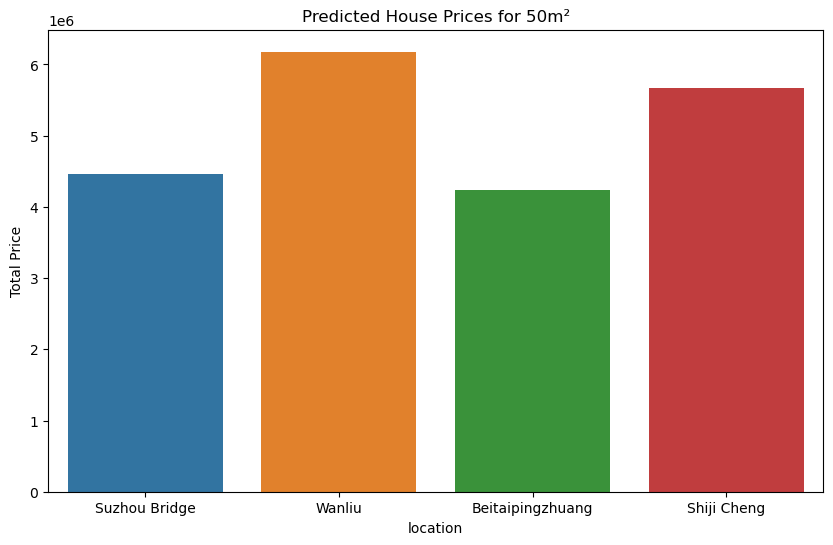

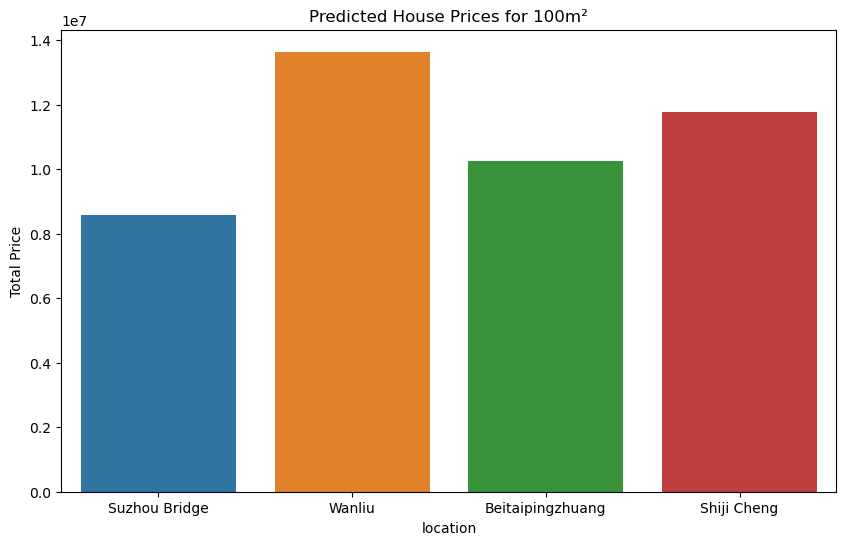

In [14]:
# 8. Plot predictions
def plot_predictions(df, size, title):
    df_filtered = df[df['area'] == size].copy()
    df_filtered['location'] = df_filtered['num'].map(location_map)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='location', y='total_house_price', data=df_filtered)
    plt.title(title)
    plt.ylabel('Total Price')
    plt.show()

plot_predictions(predict_data, 50, 'Predicted House Prices for 50m²')
plot_predictions(predict_data, 100, 'Predicted House Prices for 100m²')